<a href="https://colab.research.google.com/github/itsmepriyabrata/priyabrata_ai_python/blob/main/Deep_learning_mathematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code showcases matrix multiplications using both NumPy and PyTorch, emphasizing interoperability between these libraries by demonstrating equivalent operations with mixed data types.

In [1]:
# import libraries
import numpy as np
import torch
# create some random matrices
A = np.random.randn(3,4)
B = np.random.randn(4,5)
C = np.random.randn(3,7)

# try some multiplications...
print(np.round( A@B   ,2)), print(' ')
# print(np.round( A@C   ,2)), print(' ')
# print(np.round( B@C   ,2)), print(' ')
print(np.round( C.T@A ,2))
# create some random matrices
A  = torch.randn(3,4)
B  = torch.randn(4,5)
C1 = np.random.randn(4,7)
C2 = torch.tensor( C1,dtype=torch.float )

# try some multiplications...
# print(np.round( A@B   ,2)), print(' ')
# print(np.round( A@B.T ,2)), print(' ')
print(np.round( A@C1  ,2)), print(' ')
print(np.round( A@C2  ,2))

[[ 0.59  1.61  1.94 -0.99 -0.66]
 [ 4.91  0.75  2.31 -0.37 -2.05]
 [-0.7  -2.66  1.53  0.61 -0.42]]
 
[[ 2.3  -0.61 -2.11  1.73]
 [-1.52 -0.4   1.61 -0.37]
 [ 0.31 -0.42 -0.95  0.09]
 [-2.   -0.76  0.43 -1.33]
 [ 1.97 -0.47 -2.92  0.76]
 [ 1.01  0.81  0.42  0.72]
 [-1.85  0.66  0.48 -2.26]]
tensor([[-2.7300,  0.8700,  1.0200, -2.4400, -1.3800,  1.3700,  4.0900],
        [-0.8000,  0.2500,  0.1900, -1.0700, -4.9300, -1.0500, -2.2700],
        [-1.4400,  2.8000,  1.3500, -2.0900, -3.3000, -2.2800, -0.7700]],
       dtype=torch.float64)
 
tensor([[-2.7300,  0.8700,  1.0200, -2.4400, -1.3800,  1.3700,  4.0900],
        [-0.8000,  0.2500,  0.1900, -1.0700, -4.9300, -1.0500, -2.2700],
        [-1.4400,  2.8000,  1.3500, -2.0900, -3.3000, -2.2800, -0.7700]])


This code is about computing the mean and variance of a list of numbers using different methods and understanding the impact of different degrees of freedom (ddof) on the variance calculation, especially for large datasets.

In [2]:
# import libraries
import numpy as np
# create a list of numbers to compute the mean and variance of
x = [1,2,4,6,5,4,0]
n = len(x)

# compute the mean
mean1 = np.mean(x)
mean2 = np.sum(x) / n

# print them
print(mean1)
print(mean2)
# variance

var1 = np.var(x)
var2 = (1/(n-1)) * np.sum( (x-mean1)**2 )

print(var1)
print(var2)
# uh oh!

var3 = np.var(x,ddof=1)

print(var3)
print(var2)
# does it matter for large N?

N = 10000
x = np.random.randint(0,high=20,size=N)

var0 = np.var(x,ddof=0) # default
var1 = np.var(x,ddof=1) # unbiased

print(var0)
print(var1)

3.142857142857143
3.142857142857143
4.122448979591836
4.809523809523809
4.809523809523809
4.809523809523809
33.34589535999999
33.3492302830283


This code demonstrates the generation of random numbers using NumPy and PyTorch, and explores how setting seeds affects the reproducibility of these random numbers.

In [3]:
# import libraries
import numpy as np
import torch
# generate a few random numbers
np.random.randn(5)
# repeat after fixing the seed (old-but-still-widely-used method)
np.random.seed(17)
print(np.random.randn(5))
print(np.random.randn(5))

# [ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
# [ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
randseed1 = np.random.RandomState(17)
randseed2 = np.random.RandomState(20210530)

print( randseed1.randn(5) ) # same sequence
print( randseed2.randn(5) ) # different from above, but same each time
print( randseed1.randn(5) ) # same as two up
print( randseed2.randn(5) ) # same as two up
print( np.random.randn(5) ) # different every time
torch.randn(5)
torch.manual_seed(17)
print( torch.randn(5) )

# torch's seed doesn't spread to numpy
print( np.random.randn(5) )


[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[-0.24972681 -1.01951826  2.23461339  0.72764703  1.2921122 ]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
[ 1.15494929 -0.0015467  -0.11196868 -1.08136725  0.10265891]
[ 2.171257    1.15231025 -1.81881234 -0.13804934  0.53983961]
tensor([-1.4135,  0.2336,  0.0340,  0.3499, -0.0145])
[-1.77528229  1.31487654 -0.47344805 -1.0922299  -0.25002744]


This code demonstrates the concepts of population mean, sample mean, and the distribution of sample means through repeated sampling, often referred to as the sampling distribution of the sample mean. The process is illustrated using NumPy for computations and Matplotlib for visualizations.

1.625
2.0


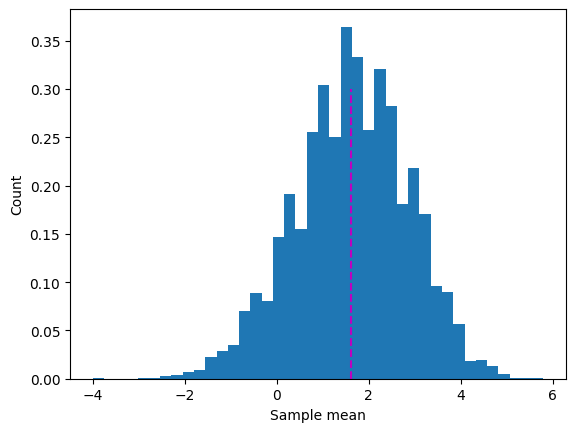

In [4]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
# create a list of numbers to compute the mean and variance of
x = [1,2,4,6,5,4,0,-4,5,-2,6,10,-9,1,3,-6]
n = len(x)

# compute the population mean
popmean = np.mean(x)

# compute a sample mean
sample = np.random.choice(x,size=5,replace=True)
sampmean = np.mean(sample)

# print them
print(popmean)
print(sampmean)
# compute lots of sample means

# number of experiments to run
nExpers = 10000

# run the experiment!
sampleMeans = np.zeros(nExpers)
for i in range(nExpers):

  # step 1: draw a sample
  sample = np.random.choice(x,size=15,replace=True)

  # step 2: compute its mean
  sampleMeans[i] = np.mean(sample)



# show the results as a histogram
plt.hist(sampleMeans,bins=40,density=True)
plt.plot([popmean,popmean],[0,.3],'m--')
plt.ylabel('Count')
plt.xlabel('Sample mean')
plt.show()


This code demonstrates how to compute the softmax function both manually using NumPy and using PyTorch's nn.Softmax class. It also includes visualizations to compare the results of the two methods.

[0.09003057 0.24472847 0.66524096]
1.0
[-4 10  3 11 12  9  7  3 11 -3  9  4 12 -1  6 -4 12 12  7  6 -3 -4 -4 -5
 -2]


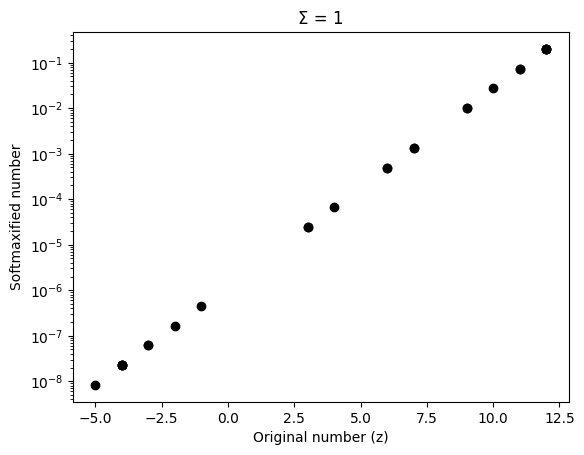

tensor([2.2554e-08, 2.7123e-02, 2.4733e-05, 7.3728e-02, 2.0041e-01, 9.9780e-03,
        1.3504e-03, 2.4733e-05, 7.3728e-02, 6.1307e-08, 9.9780e-03, 6.7231e-05,
        2.0041e-01, 4.5300e-07, 4.9677e-04, 2.2554e-08, 2.0041e-01, 2.0041e-01,
        1.3504e-03, 4.9677e-04, 6.1307e-08, 2.2554e-08, 2.2554e-08, 8.2970e-09,
        1.6665e-07])


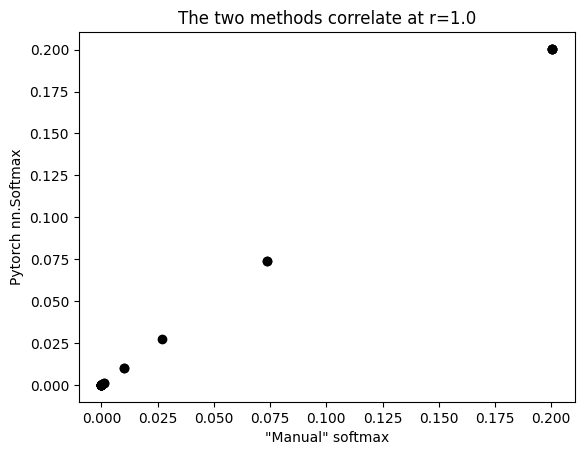

In [8]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# "manually" in numpy

# the list of numbers
z = [1,2,3]

# compute the softmax result
num = np.exp(z)
den = np.sum( np.exp(z) )
sigma = num / den

print(sigma)
print(np.sum(sigma))
# repeat with some random integers
z = np.random.randint(-5,high=15,size=25)
print(z)

# compute the softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

# compare
plt.plot(z,sigma,'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified number')
plt.yscale('log')
plt.title('Σ = %g' %np.sum(sigma))
plt.show()
# slightly more involved using torch.nn

# create an instance of the softmax activation class
softfun = nn.Softmax(dim=0)

# then apply the data to that function
sigmaT = softfun( torch.Tensor(z) )

# now we get the results
print(sigmaT)
# show that they are the same
plt.plot(sigma,sigmaT,'ko')
plt.xlabel('"Manual" softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()


This code demonstrates the creation, transposition, and double transposition of vectors and matrices using both NumPy and PyTorch. Additionally, it examines the data types of these variables to highlight the differences between NumPy arrays and PyTorch tensors.


In [1]:
# import libraries
import numpy as np
import torch

# create a vector
nv = np.array([ [1,2,3,4] ])
print(nv), print(' ')

# transpose it
print(nv.T), print(' ')

# transpose the transpose!
nvT = nv.T
print(nvT.T)
# repeat for a matrix
nM = np.array([ [1,2,3,4],
                [5,6,7,8]
               ])
print(nM), print(' ')

# transpose it
print(nM.T), print(' ')

# transpose the transpose!
nMT = nM.T
print(nMT.T)
# create a vector
tv = torch.tensor([ [1,2,3,4] ])
print(tv), print(' ')

# transpose it
print(tv.T), print(' ')

# transpose the transpose!
tvT = tv.T
print(tvT.T)
# repeat for a matrix
tM = torch.tensor([ [1,2,3,4],[5,6,7,8] ])
print(tM), print(' ')

# transpose it
print(tM.T), print(' ')

# transpose the transpose!
tMT = tM.T
print(tMT.T)

# examine data types
print(f'Variable nv is of type {type(nv)}')
print(f'Variable nM is of type {type(nM)}')
print(f'Variable tv is of type {type(tv)}')
print(f'Variable tM is of type {type(tM)}')


[[1 2 3 4]]
 
[[1]
 [2]
 [3]
 [4]]
 
[[1 2 3 4]]
[[1 2 3 4]
 [5 6 7 8]]
 
[[1 5]
 [2 6]
 [3 7]
 [4 8]]
 
[[1 2 3 4]
 [5 6 7 8]]
tensor([[1, 2, 3, 4]])
 
tensor([[1],
        [2],
        [3],
        [4]])
 
tensor([[1, 2, 3, 4]])
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
 
tensor([[1, 5],
        [2, 6],
        [3, 7],
        [4, 8]])
 
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
Variable nv is of type <class 'numpy.ndarray'>
Variable nM is of type <class 'numpy.ndarray'>
Variable tv is of type <class 'torch.Tensor'>
Variable tM is of type <class 'torch.Tensor'>


This code demonstrates how to generate and visualize two datasets with different means, perform an independent samples t-test to compare their means, and plot the results. The t-test is used to determine if there is a statistically significant difference between the means of the two datasets.

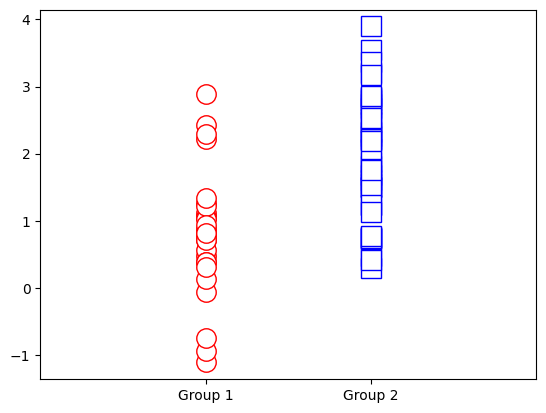

-5.0566207535818455
3.446237169425492e-06


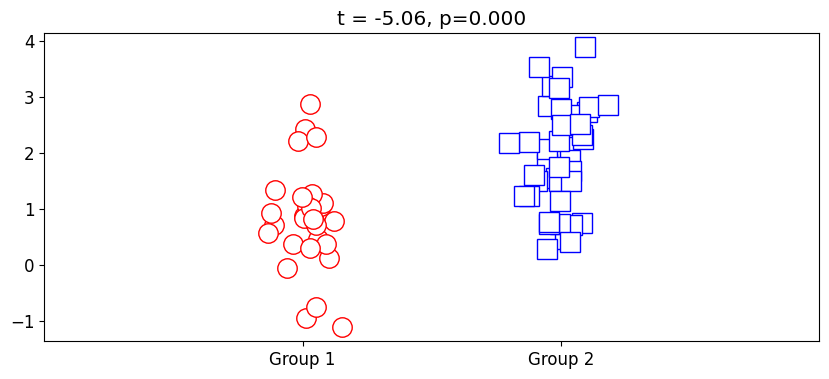

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# NEW!
import scipy.stats as stats
# parameters
n1 = 30   # samples in dataset 1
n2 = 40   # ...and 2
mu1 = 1   # population mean in dataset 1
mu2 = 2   # population mean in dataset 2

# generate the data
data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)



# plot them
plt.plot(np.zeros(n1),data1,'ro',markerfacecolor='w',markersize=14)
plt.plot(np.ones(n2), data2,'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1','Group 2'])
plt.show()
# t-test via stats package

# _ind = independent samples
t,p = stats.ttest_ind(data1,data2)
print(t)
print(p)
# common way to show t-test results in a plot
fig = plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size':12}) # change the font size

plt.plot(0+np.random.randn(n1)/15, data1, 'ro',markerfacecolor='w',markersize=14)
plt.plot(1+np.random.randn(n2)/15, data2, 'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1','Group 2'])

# set the title to include the t-value and p-value
plt.title(f't = {t:.2f}, p={p:.3f}')

plt.show()